In [2]:

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# import seaborn as sns
# import big_o
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation


In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.3 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def create_node(N,obstacles): 
    while True:
        sn = [random.randint(-N/2,N/2),random.randint(-N/2,N/2)] 
        if sn not in obstacles:
            start_node = sn
            break
    return start_node

In [4]:
def find_neighbors(current_node):
    x,y = current_node
    n1 = [x-10,y]
    n2 = [x+10,y]
    n3 = [x,y-10]
    n4 = [x,y+10]
    return n1,n2,n3,n4

## Heuristic functions

In [5]:
def manhattan_distance(start,end):
    x1,y1 = start
    x2,y2 = end
    h = abs(x1-x2) + abs(y1-y2)
    return h

def euclidean_distance(start,end):
    x1,y1 = start
    x2,y2 = end
    d = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return d


In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# import seaborn as sns
# import big_o
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import json

import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon,LineString,Point



In [8]:
# json.loads("/Users/clairegan/Documents/Python/ROBOTICS/boundaries.json")

with open("/content/drive/MyDrive/boundaries.json") as json_file:
    boundary = json.load(json_file)
lines = np.array(boundary["lines"])
add_lines = np.array(boundary["add_lines"])
lines

array([[2281, 1401, 2600, 1401],
       [2923, 1821, 2923,  409],
       [1903, 1701, 2211, 1701],
       ...,
       [2203,  967, 2205,  965],
       [2566, 1865, 2566, 1856],
       [1948, 1105, 1976, 1105]])

In [9]:
start_node = [c for c in zip(lines[:,0],lines[:,1])]
end_node = [c for c in zip(lines[:,2],lines[:,3])]
lines_geometry = [LineString([start_node[i],end_node[i]]) for i in range(len(lines))]
lines_geometry

[<LINESTRING (2281 1401, 2600 1401)>,
 <LINESTRING (2923 1821, 2923 409)>,
 <LINESTRING (1903 1701, 2211 1701)>,
 <LINESTRING (2286 1111, 2593 1111)>,
 <LINESTRING (1446 1253, 1454 1253)>,
 <LINESTRING (2926 1820, 2926 410)>,
 <LINESTRING (1185 1906, 1185 1805)>,
 <LINESTRING (2059 1251, 2209 1251)>,
 <LINESTRING (1451 1109, 1493 1109)>,
 <LINESTRING (538 1493, 870 1493)>,
 <LINESTRING (2274 1105, 2605 1105)>,
 <LINESTRING (2061 1703, 2061 957)>,
 <LINESTRING (1533 1103, 1827 1103)>,
 <LINESTRING (1451 1399, 1834 1399)>,
 <LINESTRING (1183 958, 1183 829)>,
 <LINESTRING (2442 1703, 2442 957)>,
 <LINESTRING (2598 1821, 2925 1821)>,
 <LINESTRING (2278 1697, 2602 1697)>,
 <LINESTRING (2438 1703, 2438 957)>,
 <LINESTRING (2281 1407, 2435 1407)>,
 <LINESTRING (1679 1703, 1679 958)>,
 <LINESTRING (1903 710, 2010 710)>,
 <LINESTRING (1171 979, 1171 966)>,
 <LINESTRING (520 960, 520 652)>,
 <LINESTRING (506 1348, 506 617)>,
 <LINESTRING (1903 545, 2166 545)>,
 <LINESTRING (2419 541, 2602 541)>,

In [10]:
def create_node(N,gdf_boundary): 
    start_node = []
    for n in range(N):
        sn = [random.randint(500,2000),random.randint(500,1000)] 
        while True:
            for i in range(len(gdf_boundary)):
                while True:
                    if Point(sn[0],sn[1]).intersects(gdf_boundary["geometry"].values[i]) is False:
                    # if Point(sn[0],sn[1]).within(gdf_boundary.geometry[i]) is False:
                        # print("{}: no intersect".format(str(i)))
                        # print(i)
                        break
                    else:
                        sn = [random.randint(500,3000),random.randint(1000,2000)]
                        # print("{}: intersect".format(str(i)))
            break
        start_node.append(sn)            
    return start_node

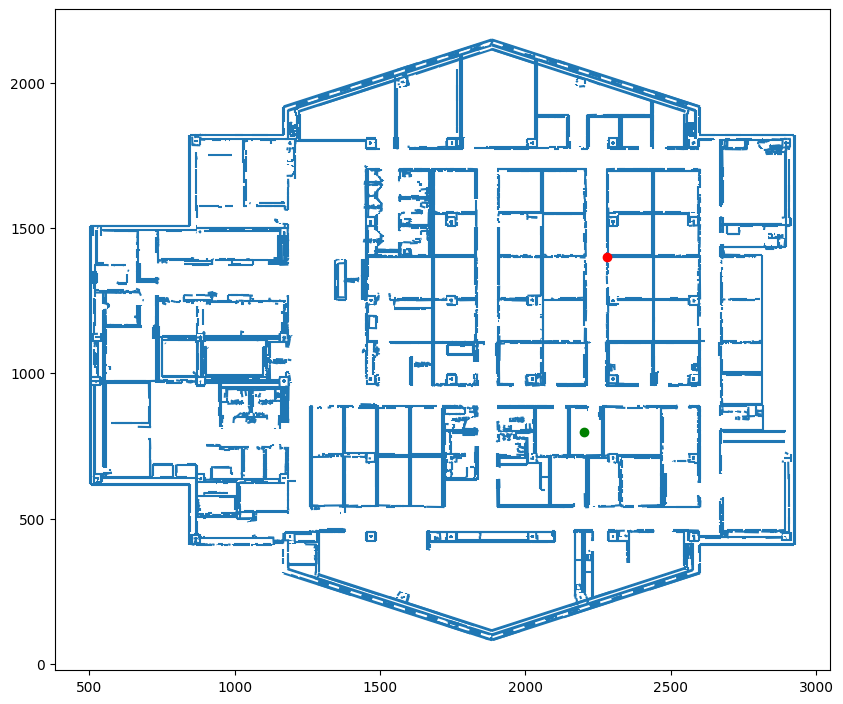

In [11]:
xy_0 = [c for c in zip(lines[:,0],lines[:,1])]
xy_1 = [c for c in zip(lines[:,2],lines[:,3])]
lines_geometry = [LineString([xy_0[i],xy_1[i]]) for i in range(len(lines))]
df = pd.DataFrame(
    {
        "start": xy_0,
        "end": xy_1,
        "label": ['{}'.format(str(i)) for i in range(len(lines))],
    }
)
gdf_boundary = gpd.GeoDataFrame(
    df,
    geometry=lines_geometry,
)

# res = gdf.dissolve("label").convex_hull
# res.to_wkt()
gdf_boundary.plot(figsize=(10,10))

robots = create_node(5,gdf_boundary)
destination = create_node(5,gdf_boundary)
start_node =[2280, 1401]
end_node = [2203,799]
plt.plot(start_node[0],start_node[1],"o",color="r",label="robots") 
plt.plot(end_node[0],end_node[1],"o",color="g",label="targets")
# for i in range(5):
#     sn = robots[i]
#     en = destination[i]
#     plt.plot(sn[0],sn[1],"o",color="r",label="robots") 
#     plt.plot(en[0],en[1],"o",color="g",label="targets") 
# plt.legend()

    


In [13]:
# aaa = [list(gdf_boundary.intersects(LineString([start_node,n]))) for n in neighbors]
# if True in aaa[0]:
#     print("True")

In [ ]:
end_node

[2203, 799]

In [ ]:
[LineString([start_node,end_node[i]]) for i in range(len(lines))]

In [17]:
# import os
# import numpy as np
# import json
# import h5py

# path='.'
# current= 1
# distination='13384'

# with open(os.path.join(path, '/content/drive/MyDrive/boundaries.json'), 'r') as f:
#     data = json.load(f)
#     lines = data['lines']
#     add_lines = data['add_lines']
#     for i in add_lines:
#         lines.append(i)
#     destinations = data['destination']
#     names = []
#     pts = []
#     for k, v in destinations.items():
#         ll = k.split('-')
#         pts.append([int(ll[0]), int(ll[1])])
#         names.append(v['id'])
#     targets_num = len(destinations)
#     for k, v in data['waypoints'].items():
#         names.append(k)
#         pts.append(v)
#     pts = np.array(pts)
#     knames = names

# def get_path(Pr, j):
#     try:
#         paths = [knames[j]]
#         k = j
#         while Pr[k] != -9999:
#             paths.append(knames[Pr[k]])
#             k = Pr[k]
#     except:
#         paths = [-9999]
#     return paths

# path_file = h5py.File(os.path.join(path, 'path.h5'), 'r')['Path']
# path = get_path(path_file[distination], current)
# path

In [ ]:
path_file[path[0]]

<HDF5 dataset "14964": shape (98,), type "<i4">

In [18]:
pts

array([[ 957.        ,  787.        ],
       [1529.        ,  460.        ],
       [1303.        ,  533.        ],
       [1425.        ,  518.        ],
       [1538.        ,  523.        ],
       [1644.        ,  519.        ],
       [1876.        ,  657.        ],
       [2174.        ,  519.        ],
       [2309.        ,  516.        ],
       [2438.        ,  523.        ],
       [2262.        ,  453.        ],
       [2626.        ,  607.        ],
       [2647.        ,  603.        ],
       [1316.        ,  914.        ],
       [1423.        ,  911.        ],
       [1586.        ,  920.        ],
       [1694.        ,  918.        ],
       [ 954.        , 1342.        ],
       [1327.        , 1312.        ],
       [1520.        , 1247.        ],
       [1517.        , 1115.        ],
       [1521.        ,  974.        ],
       [1648.        ,  940.        ],
       [1858.        , 1007.        ],
       [1984.        ,  940.        ],
       [2098.        ,  9

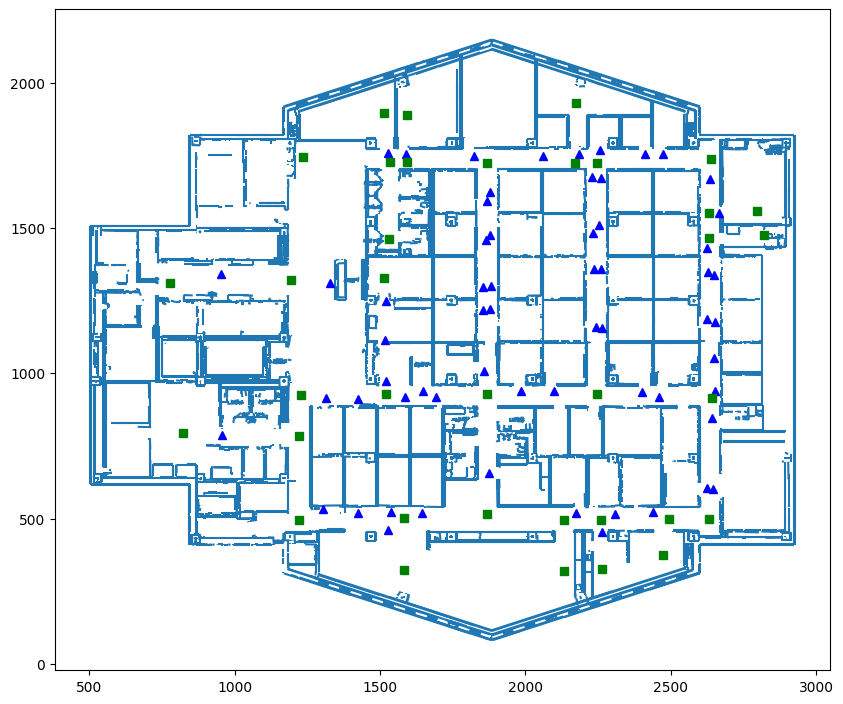

In [19]:
gdf_boundary.plot(figsize=(10,10))
for i in range(len(pts)):
    if "w" in knames[i]:
        plt.plot(pts[i][0],pts[i][1],"s",color="green") 
    else:
        plt.plot(pts[i][0],pts[i][1],"^",color="blue") 

In [20]:
import numpy as np
from sklearn.neighbors import KDTree
np.random.seed(0)
X = np.random.random((5, 2))  # 5 points in 2 dimensions
tree = KDTree(X)
nearest_dist, nearest_ind = tree.query(X, k=2)  # k=2 nearest neighbors where k1 = identity
print(X)
print(nearest_dist[:, 1])    # drop id; assumes sorted -> see args!
print(nearest_ind[:, 1])


[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]
[0.14306129 0.1786471  0.14306129 0.20869372 0.39536284]
[2 0 0 0 1]


In [21]:
def nearest_neighbor_bf(*, query_points, reference_points):
    """Use a brute force algorithm to solve the
    "Nearest Neighbor Problem".
    """
    return {
        query_p: min(
            reference_points,
            key=lambda X: SED(X, query_p),
        )
        for query_p in query_points
    }

reference_points = pts
query_points = [
    (2259., 1358.)
]

nearest_neighbor_bf(
    reference_points = reference_points,
    query_points = query_points,
)

NameError: ignored

In [ ]:
import collections
import operator

BT = collections.namedtuple("BT", ["value", "left", "right"])
BT.__doc__ = """
A Binary Tree (BT) with a node value, and left- and
right-subtrees.
"""

def kdtree(points):
    """Construct a k-d tree from an iterable of points.
    
    This algorithm is taken from Wikipedia. For more details,
    
    > https://en.wikipedia.org/wiki/K-d_tree#Construction
    
    """
    k = len(points[0])
    
    def build(*, points, depth):
        """Build a k-d tree from a set of points at a given
        depth.
        """
        if len(points) == 0:
            return None
        
        points.sort(key=operator.itemgetter(depth % k))
        middle = len(points) // 2
        
        return BT(
            value = points[middle],
            left = build(
                points=points[:middle],
                depth=depth+1,
            ),
            right = build(
                points=points[middle+1:],
                depth=depth+1,
            ),
        )
    
    return build(points=list(points), depth=0)
reference_points = pts
kdtree(reference_points)

BT(value=array([2059., 1746.]), left=BT(value=array([1517., 1115.]), left=BT(value=array([1538.,  523.]), left=BT(value=array([823.33979497, 796.00356801]), left=BT(value=array([1303.,  533.]), left=BT(value=array([1220.63921679,  785.741835  ]), left=BT(value=array([1220.29538292,  495.4828512 ]), left=None, right=None), right=BT(value=array([957., 787.]), left=None, right=None)), right=BT(value=array([1425.,  518.]), left=BT(value=array([1529.,  460.]), left=None, right=None), right=None)), right=BT(value=array([1423.,  911.]), left=BT(value=array([1226.8859374 ,  926.45667562]), left=BT(value=array([1316.,  914.]), left=None, right=None), right=None), right=BT(value=array([1521.,  974.]), left=BT(value=array([1521.26473667,  927.13968908]), left=None, right=None), right=None))), right=BT(value=array([1694.,  918.]), left=BT(value=array([1644.,  519.]), left=BT(value=array([1582.35103241,  501.83627111]), left=BT(value=array([1582.35103241,  323.56975926]), left=None, right=None), ri

In [23]:
def manhattan_distance(p1, p2):
  return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

from queue import PriorityQueue
import heapq
import math
def A_star(start_node, end_node):
  open_list = [(0, start_node)]  # pq
  closed_list = set()
  came_from = {}  # dict current node and parent node
  g_score = {start_node: 0} # gp
  f_score = {start_node: manhattan_distance(start_node, end_node)}
  while open_list:
    _, current = heapq.heappop(open_list)
    # print("current", current)
    neighbors = find_neighbors(current)
    new_line = list(neighbors)
    aaa = [list(gdf_boundary.intersects(LineString([current,n]))) for n in neighbors]
    for n in range(len(neighbors)):
      if True in aaa[n]:
          new_line.remove(neighbors[n])
    # print("new", new_line)
    for neighbor in new_line:
      neighbor = tuple(neighbor)
      if neighbor in closed_list:
        continue

      if neighbor not in [item[1] for item in open_list]:
        FN = g_score[current] + abs(neighbor[0]-current[0])+abs(neighbor[1]-current[1]) + manhattan_distance(neighbor, end_node)
        came_from[neighbor] = current
        heapq.heappush(open_list, (FN, neighbor))
        g_score[neighbor] = g_score[current] + abs(neighbor[0]-current[0])+abs(neighbor[1]-current[1])
        f_score[neighbor] = FN
      else:
        GN = g_score[current] + abs(neighbor[0]-current[0])+abs(neighbor[1]-current[1])
        if GN < g_score[neighbor]:
          FN = GN + manhattan_distance(neighbor, end_node)
          # print("gs", g_score[neighbor])
          # print(open_list)
          open_list.remove((g_score[neighbor] + manhattan_distance(neighbor, end_node), neighbor))
          heapq.heappush(open_list, (FN, neighbor))
          g_score[neighbor] = GN
          f_score[neighbor] = FN
          came_from[neighbor] = current

    closed_list.add(current)
    if np.sqrt((current[0] - end_node[0]) ** 2 + (current[1] - end_node[1]) ** 2) <= 10:
      path = [current]
      while current in came_from:
        current = came_from[current]
        path.append(current)
      path.reverse()
      path.append(end_node)
      return path

In [24]:
start_node = tuple(pts[random.randint(0,len(pts)-1)] )
end_node = tuple(pts[random.randint(0,len(pts)-1)] )

In [25]:
np.sqrt((end_node[0]-2623.0)**2+(end_node[1]- 609.0)**2)

1153.7920089860218

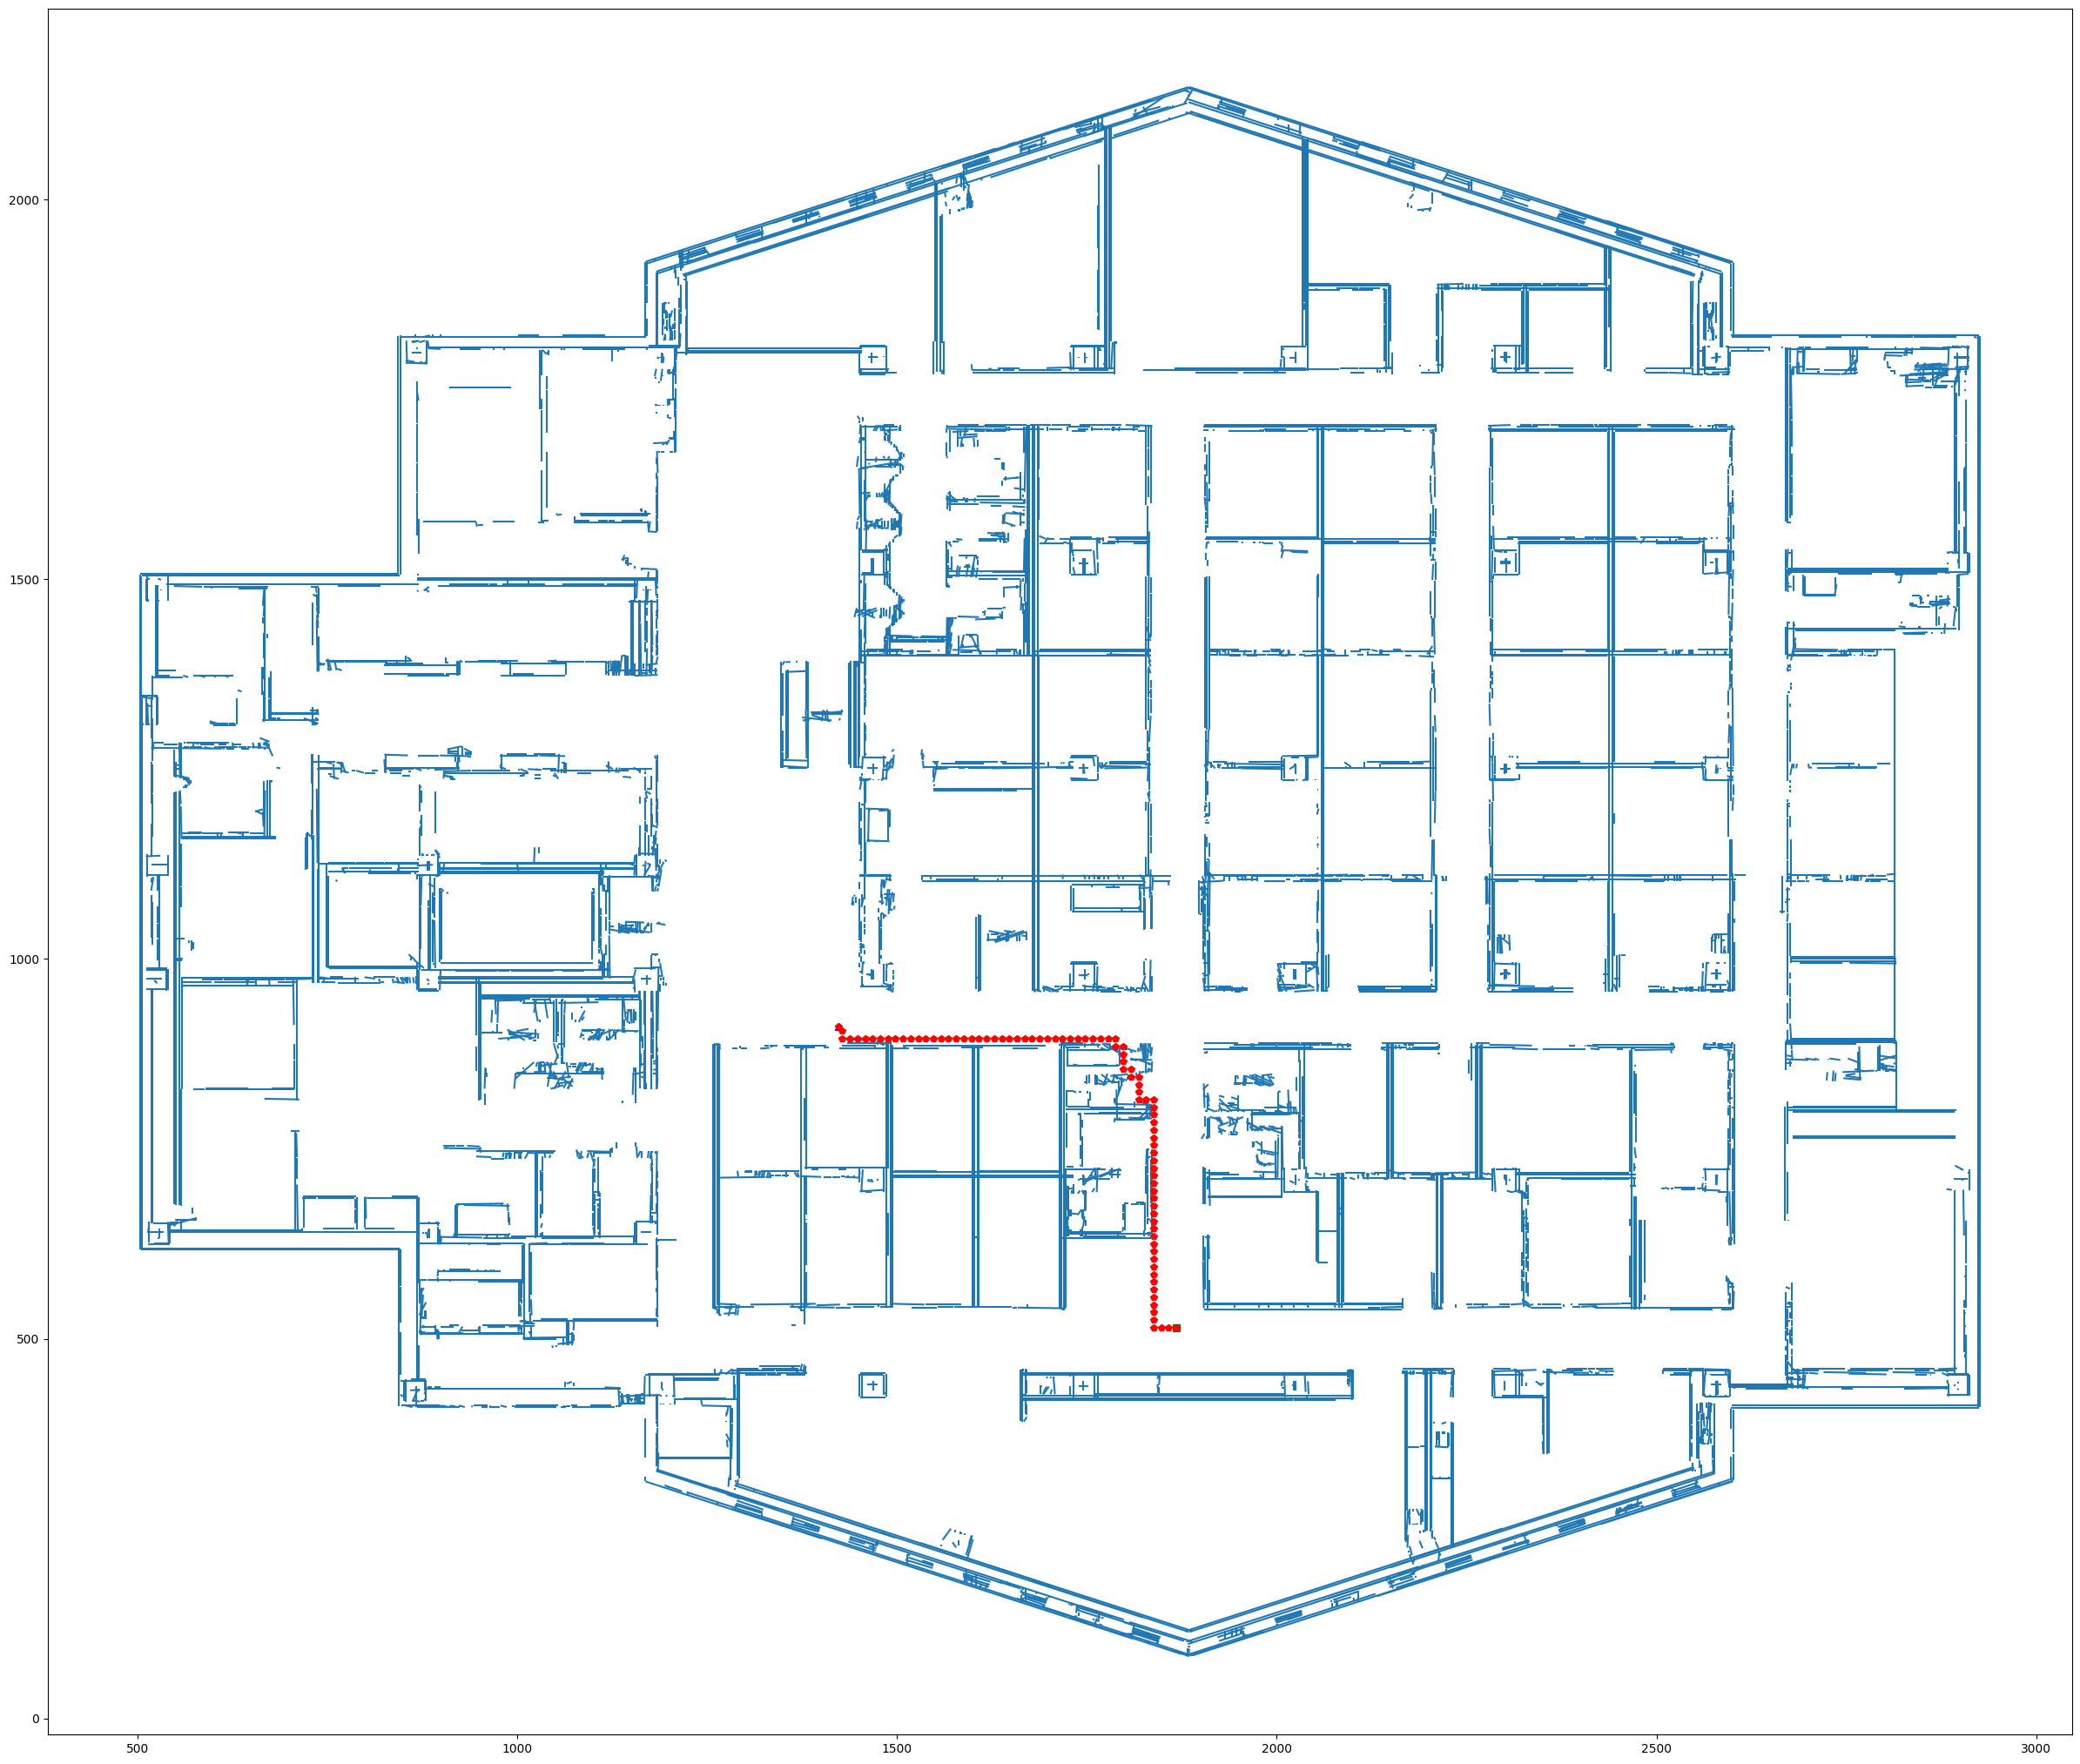

In [26]:
# start_node = (2235.0, 1360.0)
# end_node = (2821.2662011964458, 1476.052314480956)
start_node = tuple(pts[random.randint(0,len(pts)-1)] )
end_node = tuple(pts[random.randint(0,len(pts)-1)] )
# start_node
steps = A_star(start_node, end_node)
gdf_boundary.plot(figsize=(30,30))
plt.plot(start_node[0],start_node[1],"s",color="green") 
plt.plot(end_node[0],end_node[1],"^",color="blue")
for i in range(len(steps)):
  plt.plot(steps[i][0],steps[i][1],'p',color="red")
plt.show()

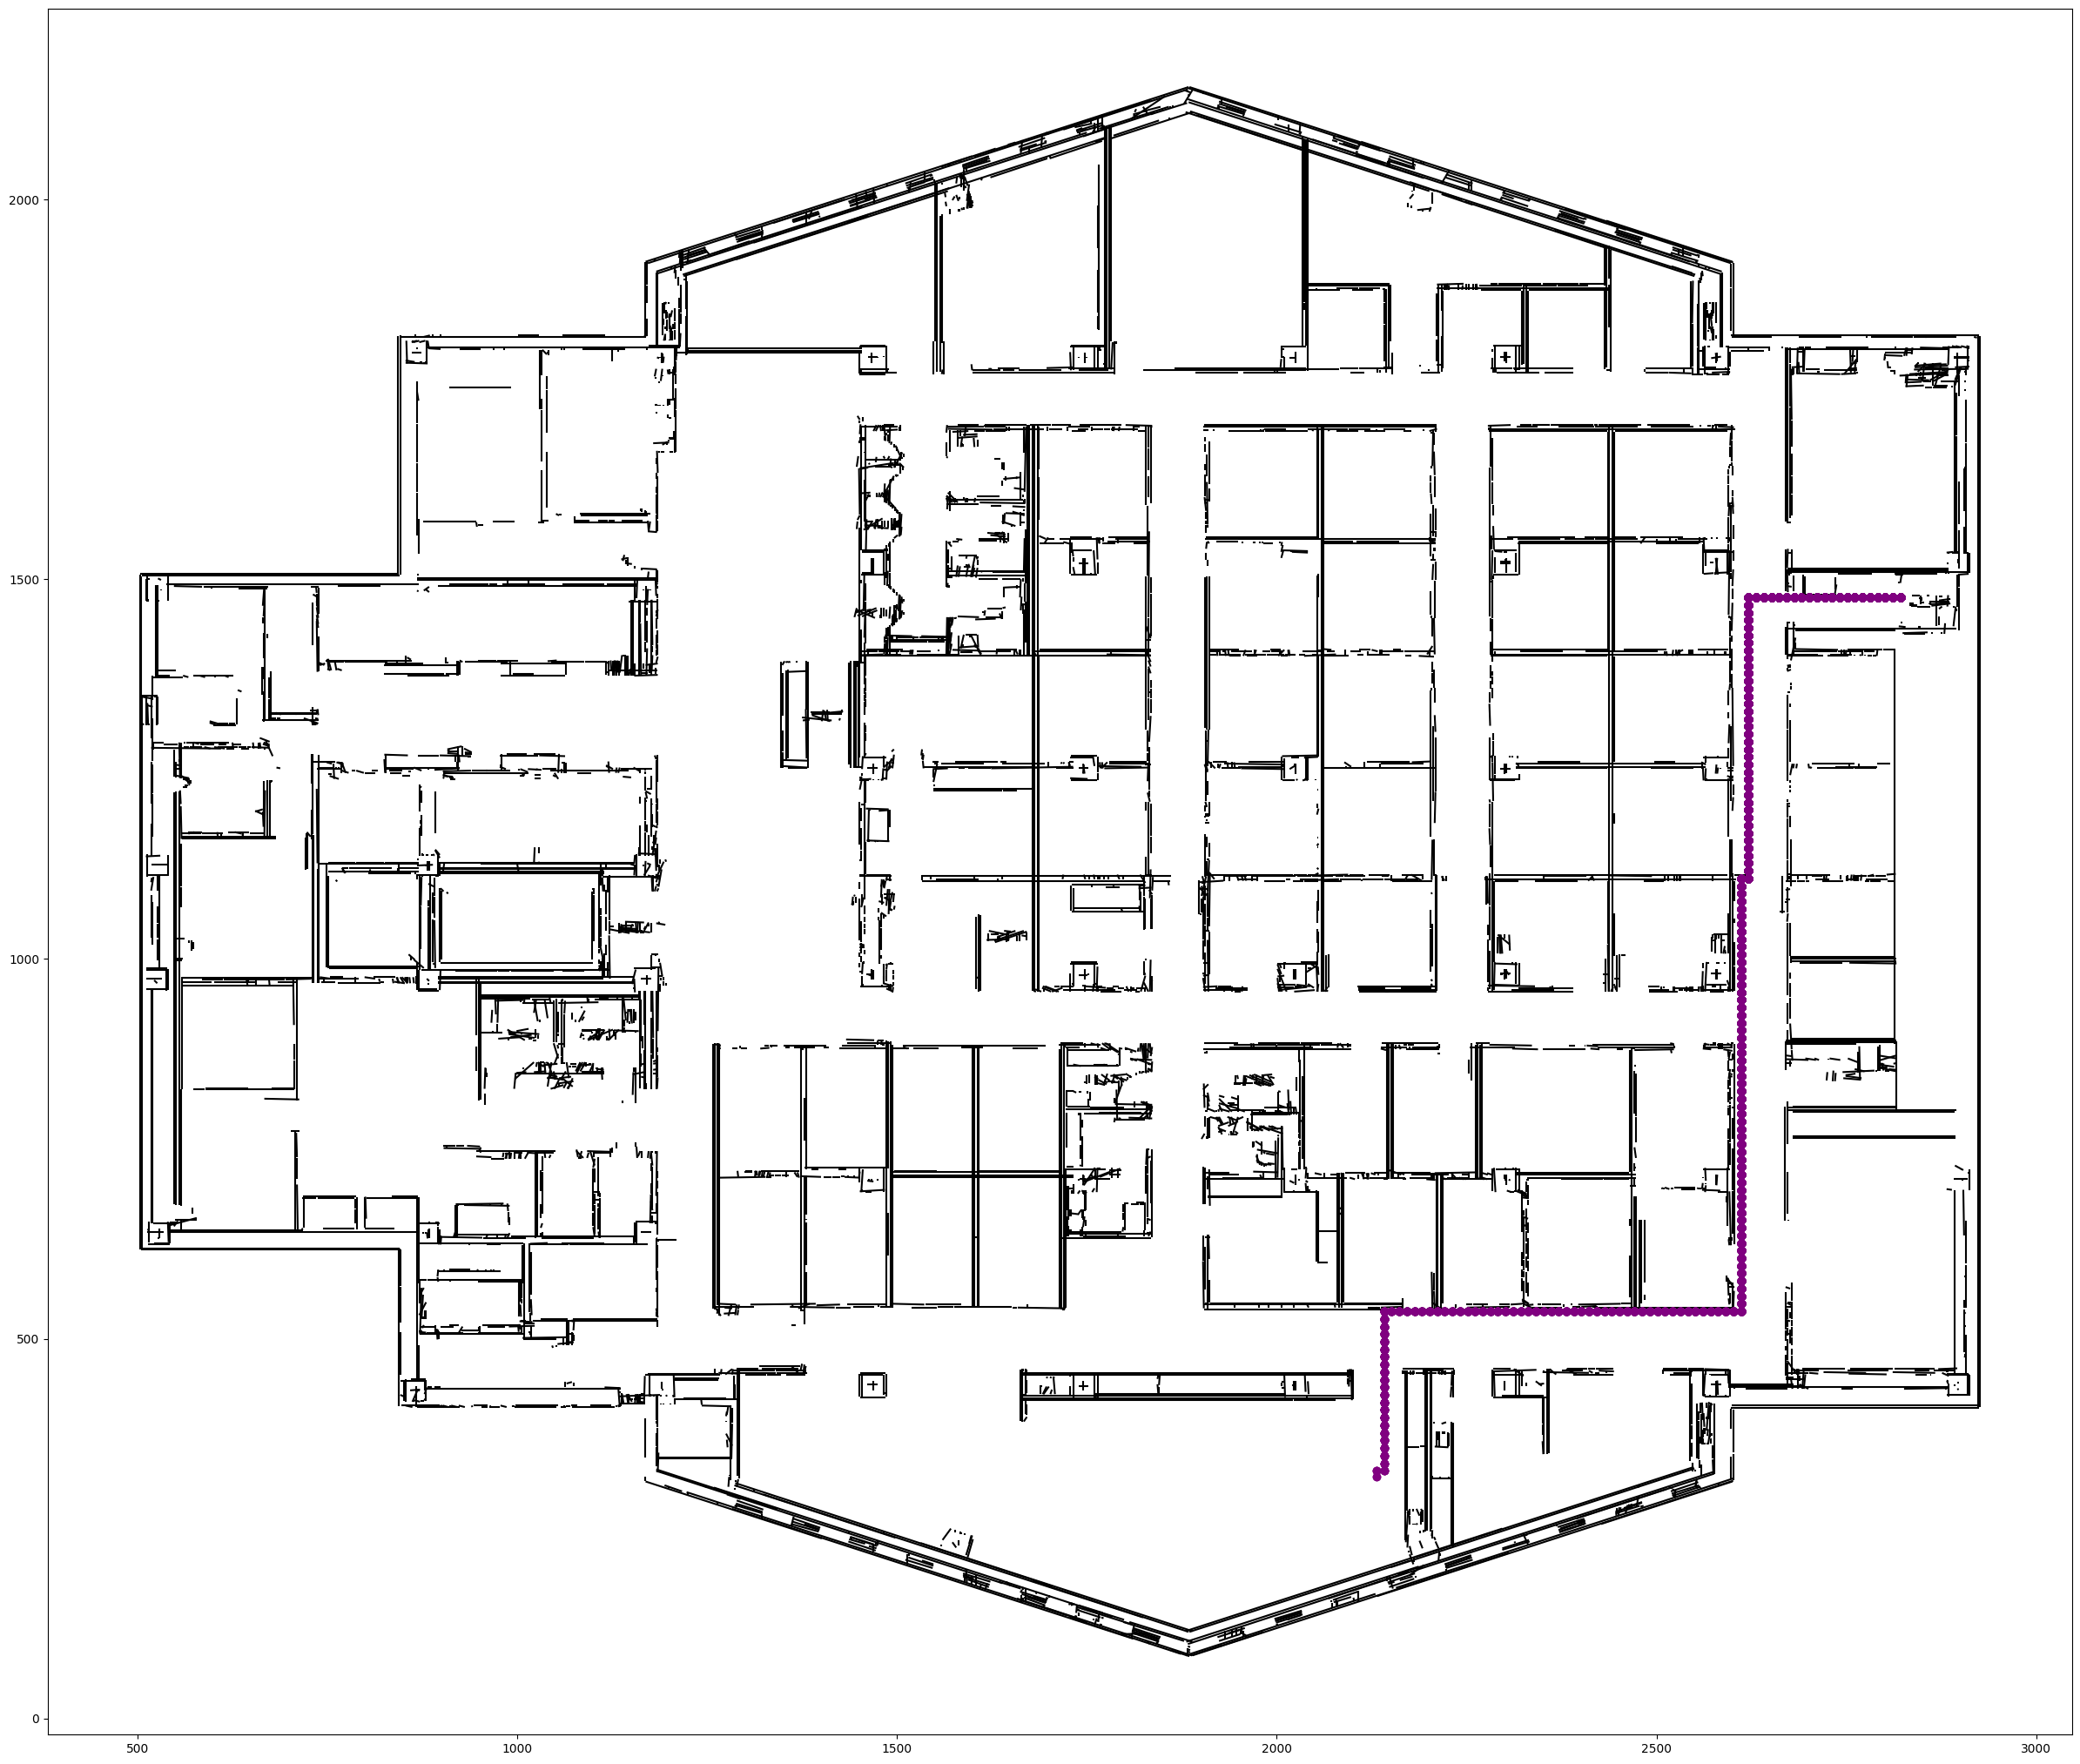

In [ ]:
# p0 = steps
# x0,y0 = [],[]
# fig,ax = plt.subplots(1,figsize=(30,30))
# gdf_boundary.plot(figsize=(20,20),color="black",ax=ax)
# def animate(n):
#     # colorp = color[int((n + 5)%6)]
#     x0.append(p0[n][0])
#     y0.append(p0[n][1])
#     # x1.append(p1[n][0])
#     # y1.append(p1[n][1])
#     # x2.append(p2[n][0])
#     # y2.append(p2[n][1])
#     # x3.append(p3[n][0])
#     # y3.append(p3[n][1])
#     # x4.append(p4[n][0])
#     # y4.append(p4[n][1])
#     # points = path[m]
#     # point = points[n]
#     plt.plot(x0,y0,'o',color='purple')
#     # plt.plot(x1,y1,'o',color='blue')
#     # plt.plot(x2,y2,'o',color='orange')
#     # plt.plot(x3,y3,'o',color='brown')
#     # plt.plot(x4,y4,'o',color='yellow')

# # # for p in path_eucl:   
# #         print(n,len(path[m]))  
#         # colorp = color[int((m + 5)%6)]
#         # p = path[m][n]
#         # point.set_data(p[0],p[1])
#         # return points
# anim = FuncAnimation(fig,animate,frames=len(p0),interval=50)
# writervideo = animation.FFMpegWriter(fps=60)
# anim.save('one_robot.mp4', writer=writervideo)

# NEW!!!!!!!!!!!!!!!!!!

In [239]:
def manhattan_distance(p1, p2):
  return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])


def A_star_multi(start_nodes, end):
  end_node = list(end)
  start_node = list(start_nodes)
  number_robotics = len(start_node)
  number_target = len(end)
  achieve_node = []
  # robot to target
  start_to_target = {}
  j = 0
  for i in range(number_robotics):
    start_to_target[start_node[i]] = end_node[j]
    j += 1
    if(j == number_target):
      j = 0
  Open_list = [[] for _ in range(number_robotics)]
  Closed_list = [set() for _ in range(number_robotics)]
  Came_from = [{} for _ in range(number_robotics)]
  G_score = [{} for _ in range(number_robotics)]
  F_score = [{} for _ in range(number_robotics)]  
  PATH =  [[] for _ in range(number_robotics)] 
  for i in range(number_robotics):
    Open_list[i] = [(0, start_node[i])]
    Closed_list[i] = set()
    Came_from[i] = {}  # dict current node and parent node
    G_score[i] = {start_node[i]: 0} # gp
    F_score[i] = {start_node[i]: manhattan_distance(start_node[i], start_to_target[start_node[i]])}
  finish = 0
  while True:
    if all(not any(element) for lst in Open_list for element in lst):
      break
    for i in range(number_robotics):
      if(not Open_list[i]): # open_list is empty
        continue
      else:
        # print(i, " ", start_node[i])
        open_list = Open_list[i]
        closed_list = Closed_list[i]
        came_from = Came_from[i]
        g_score = G_score[i]
        f_score = F_score[i]
        _, current = heapq.heappop(open_list)
        # print("current", current)
        neighbors = find_neighbors(current)
        new_line = list(neighbors)
        aaa = [list(gdf_boundary.intersects(LineString([current,n]))) for n in neighbors]
        for n in range(len(neighbors)):
          if True in aaa[n]:
            new_line.remove(neighbors[n])
        ################################################################# check distance to each target ###########################
        
        cur_destination = start_to_target[start_node[i]]
        if end_node == []:
          end_node = list(end)
        if cur_destination not in end_node:
          cur_destination = end_node[0]
          
        new_target = cur_destination
        cur_distance = manhattan_distance(current, cur_destination)
        
        for tg in end_node:
          distance = manhattan_distance(current, tg)
          if(distance < cur_distance):
            cur_distance = distance
            new_target = tg
        if new_target != start_to_target[start_node[i]]:
          start_to_target[start_node[i]] = new_target
          open_list = [(0, current)]
          g_score = {current : 0}
          f_score = {current: manhattan_distance(current, new_target)}
        target = start_to_target[start_node[i]]

        # print("new", new_line)
        for neighbor in new_line:
          neighbor = tuple(neighbor)
          if neighbor in closed_list:
            continue

          if neighbor not in [item[1] for item in open_list]:
            FN = g_score[current] + abs(neighbor[0]-current[0])+abs(neighbor[1]-current[1]) + manhattan_distance(neighbor, target)
            came_from[neighbor] = current
            heapq.heappush(open_list, (FN, neighbor))
            g_score[neighbor] = g_score[current] + abs(neighbor[0]-current[0])+abs(neighbor[1]-current[1])
            f_score[neighbor] = FN
          else:
            GN = g_score[current] + abs(neighbor[0]-current[0])+abs(neighbor[1]-current[1])
            if GN < g_score[neighbor]:
              FN = GN + manhattan_distance(neighbor, target)
              # print("gs", g_score[neighbor])
              # print(open_list)
              open_list.remove((g_score[neighbor] + manhattan_distance(neighbor, target), neighbor))
              heapq.heappush(open_list, (FN, neighbor))
              g_score[neighbor] = GN
              f_score[neighbor] = FN
              came_from[neighbor] = current

      closed_list.add(current)
      Open_list[i] = open_list
      Closed_list[i] = closed_list
      Came_from[i] = came_from
      G_score[i] = g_score
      F_score[i] = f_score
      if np.sqrt((current[0] - target[0]) ** 2 + (current[1] - target[1]) ** 2) <= 10:
        path = [current]
        while current in came_from:
          current = came_from[current]
          path.append(current)
        path.reverse()
        path.append(target)
        PATH[i] = path
        Open_list[i] = []
        achieve_node.append(i)
        if target in end_node:
          end_node.remove(target)
  if len(achieve_node) == 0:
    print("one node not achieve")
    return PATH
  if len(achieve_node) != number_robotics:
    for i in range(number_robotics):
      if i not in achieve_node:
        node = []
        node.append(start_nodes[i])
        print(i, " ", node, " ", end)
        path = A_star_multi(node, end)
        # print(Came_from[i])
        diclist = list(Came_from[i].items())
        end1, end2 = diclist[-1]
        prev_path = [end1]
        while current in Came_from[i]:
          current = Came_from[i][current]
          prev_path.append(current)
        pathback = prev_path.copy()
        prev_path.reverse()
        prev_path = prev_path + pathback
        prev_path = prev_path + path[0]
        PATH[i] = prev_path
  return PATH  

In [251]:
star_nodes = []
end_nodes = []
for i in range(8):
  star_nodes.append(tuple(pts[random.randint(0,len(pts)-1)] ))
for i in range(3):
  end_nodes.append(tuple(pts[random.randint(0,len(pts))-1] ))

In [252]:
PATH = A_star_multi(star_nodes, end_nodes)

3   [(2400.0, 935.0)]   [(2471.6494838943026, 376.0512086893382), (1881.0, 1300.0), (2243.0, 1160.0)]
6   [(1984.0, 940.0)]   [(2471.6494838943026, 376.0512086893382), (1881.0, 1300.0), (2243.0, 1160.0)]


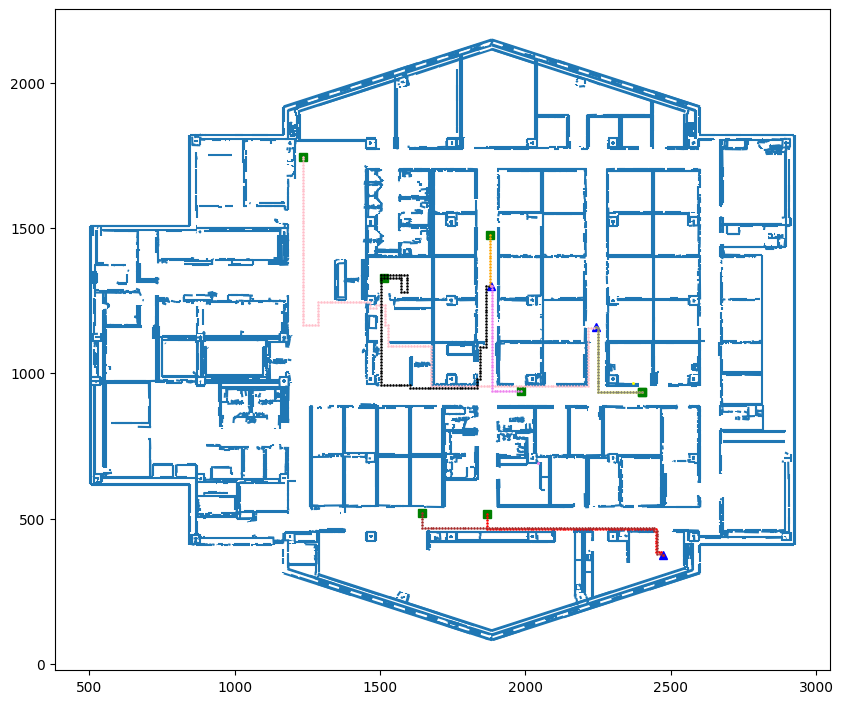

In [253]:
gdf_boundary.plot(figsize=(10,10))
for i in range(len(star_nodes)):
  start = star_nodes[i]
  plt.plot(start[0],start[1],"s",color="green") 
for i in range(len(end_nodes)):
  end = end_nodes[i]
  plt.plot(end[0],end[1],"^",color="blue")
colors = ['red', 'pink', 'black', 'yellow', 'orange', 'brown', 'violet', 'gray']
for i in range(len(PATH)):
  steps = PATH[i]
  for j in range(len(steps)):
    plt.plot(steps[j][0],steps[j][1],'p', markersize=0.9, color=colors[i % len(colors)])

plt.show()

In [ ]:
p0,p1,p2,p3,p4,p5,p6,p7= PATH[0],PATH[1],PATH[2],PATH[3],PATH[4],PATH[5],PATH[6],PATH[7]
maxlength = max(len(p0), len(p1),len(p2),len(p3),len(p4),len(p5),len(p6),len(p7))
for i in range(maxlength):
  if(i >= len(p0)):
    p0.append(p0[i - 1])
  if(i >= len(p1)):
    p1.append(p1[i - 1])
  if(i >= len(p2)):
    p2.append(p2[i - 1])
  if(i >= len(p3)):
    p3.append(p3[i - 1])
  if(i >= len(p4)):
    p4.append(p4[i - 1])
  if(i >= len(p5)):
    p5.append(p5[i - 1])
  if(i >= len(p6)):
    p6.append(p6[i - 1])
  if(i >= len(p7)):
    p7.append(p7[i - 1])

x0,x1,x2,x3,x4,x5,x6,x7 = [],[],[],[],[],[],[],[]
y0,y1,y2,y3,y4,y5,y6,y7 = [],[],[],[],[],[],[],[]

fig,ax = plt.subplots(1,figsize=(30,30))
gdf_boundary.plot(figsize=(20,20),color="black",ax=ax)
def animate(n):
    # colorp = color[int((n + 5)%6)]
    x0.append(p0[n][0])
    y0.append(p0[n][1])
    x1.append(p1[n][0])
    y1.append(p1[n][1])
    x2.append(p2[n][0])
    y2.append(p2[n][1])
    x3.append(p3[n][0])
    y3.append(p3[n][1])
    x4.append(p4[n][0])
    y4.append(p4[n][1])
    x5.append(p5[n][0])
    y5.append(p5[n][1])
    x6.append(p6[n][0])
    y6.append(p6[n][1])
    x7.append(p7[n][0])
    y7.append(p7[n][1])

    # points = path[m]
    # point = points[n]
    plt.plot(x0,y0,'o',color='purple')
    plt.plot(x1,y1,'o',color='blue')
    plt.plot(x2,y2,'o',color='orange')
    plt.plot(x3,y3,'o',color='brown')
    plt.plot(x4,y4,'o',color='yellow')
    plt.plot(x5,y5,'o',color='red')
    plt.plot(x6,y6,'o',color='pink')
    plt.plot(x7,y7,'o',color='brown')
# # for p in path_eucl:   
#         print(n,len(path[m]))  
        # colorp = color[int((m + 5)%6)]
        # p = path[m][n]
        # point.set_data(p[0],p[1])
        # return points
frame = min(len(p0), len(p1),len(p2),len(p3),len(p4),len(p5),len(p6),len(p7))
anim = FuncAnimation(fig,animate,frames=frame,interval=50)
writervideo = animation.FFMpegWriter(fps=60)
anim.save('multi_robo8_3target.mp4', writer=writervideo)

IndexError: list index out of range

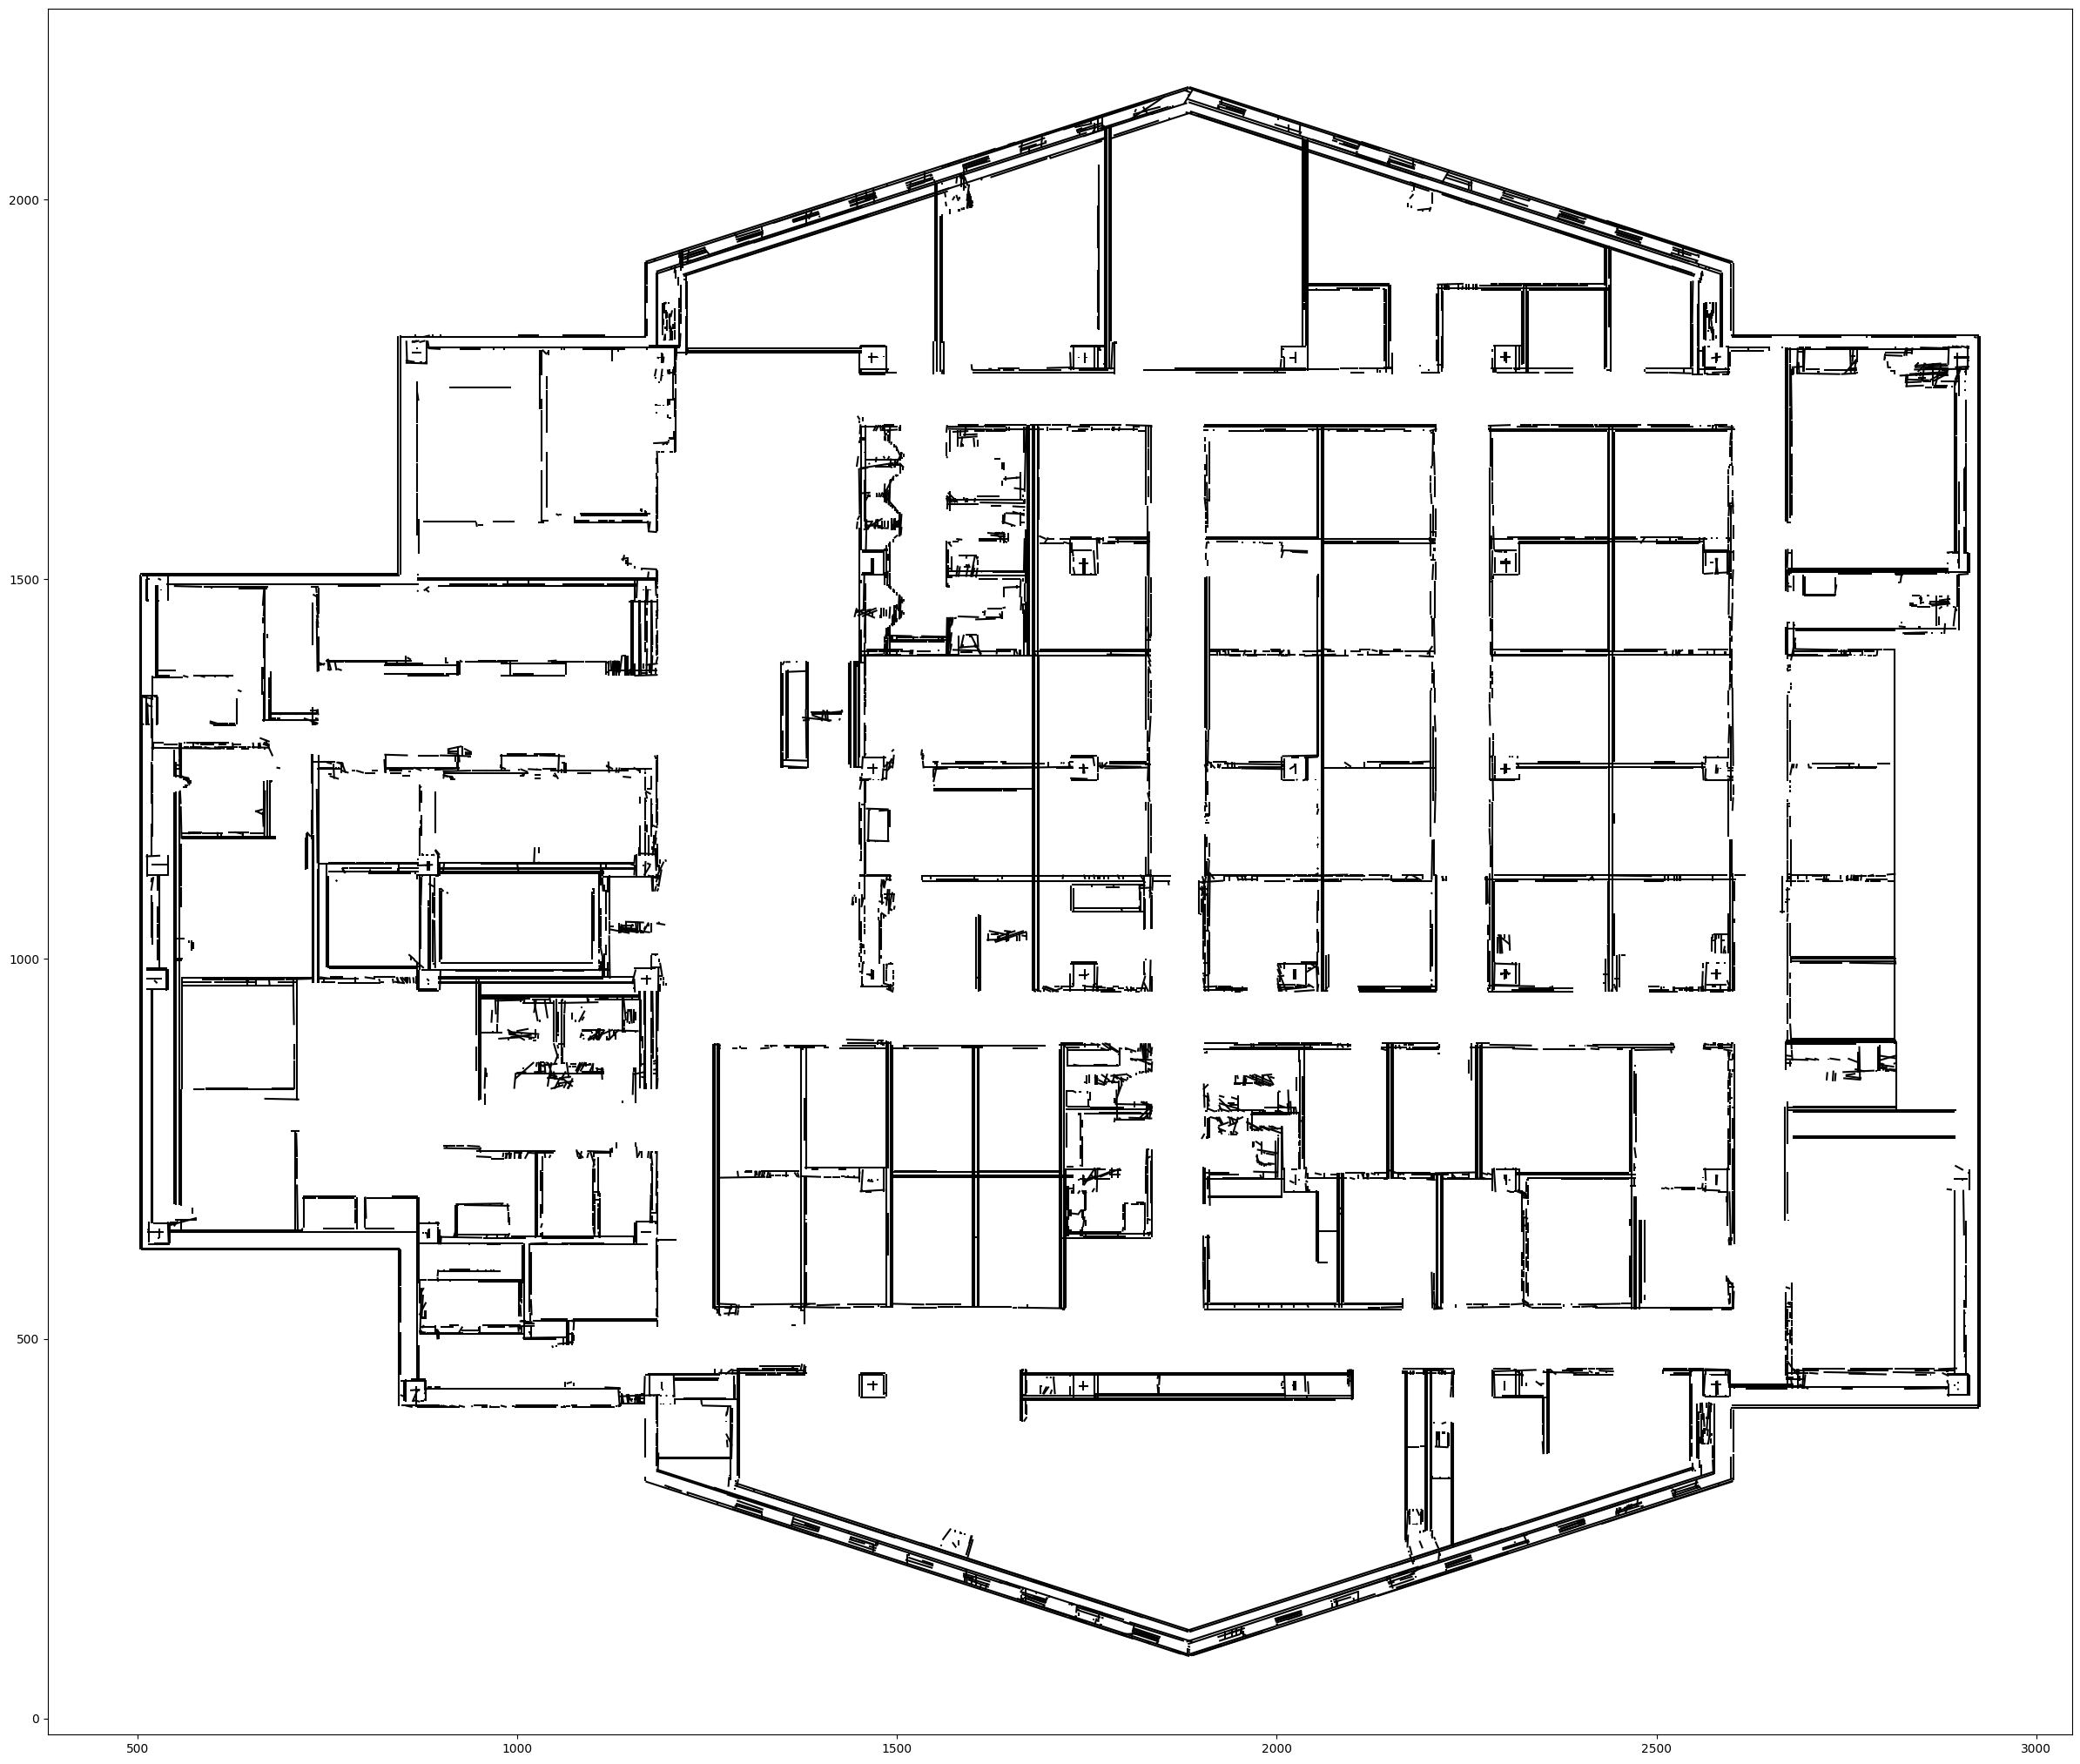

In [ ]:
# p0,p1,p2,p3,p4,p5,p6,p7= PATH[0],PATH[1],PATH[2],PATH[3],PATH[4],PATH[5],PATH[6],PATH[7]


# x0,x1,x2,x3,x4,x5,x6,x7 = [],[],[],[],[],[],[],[]
# y0,y1,y2,y3,y4,y5,y6,y7 = [],[],[],[],[],[],[],[]
# fig,ax = plt.subplots(1,figsize=(30,30))
# gdf_boundary.plot(figsize=(20,20),color="black",ax=ax)
# def animate(n):
#     # colorp = color[int((n + 5)%6)]
#     x0.append(p0[n][0])
#     y0.append(p0[n][1])
#     x1.append(p1[n][0])
#     y1.append(p1[n][1])
#     x2.append(p2[n][0])
#     y2.append(p2[n][1])
#     x3.append(p3[n][0])
#     y3.append(p3[n][1])
#     x4.append(p4[n][0])
#     y4.append(p4[n][1])
#     x5.append(p5[n][0])
#     y5.append(p5[n][1])
#     x6.append(p6[n][0])
#     y6.append(p6[n][1])
#     x7.append(p7[n][0])
#     y7.append(p7[n][1])

#     # points = path[m]
#     # point = points[n]
#     plt.plot(x0,y0,'o',color='purple')
#     plt.plot(x1,y1,'o',color='blue')
#     plt.plot(x2,y2,'o',color='orange')
#     plt.plot(x3,y3,'o',color='brown')
#     plt.plot(x4,y4,'o',color='yellow')
#     plt.plot(x5,y5,'o',color='red')
#     plt.plot(x6,y6,'o',color='pink')
#     plt.plot(x7,y7,'o',color='brown')
# # # for p in path_eucl:   
# #         print(n,len(path[m]))  
#         # colorp = color[int((m + 5)%6)]
#         # p = path[m][n]
#         # point.set_data(p[0],p[1])
#         # return points
# frame = min(len(p0), len(p1),len(p2),len(p3),len(p4),len(p5),len(p6),len(p7))
# # anim = FuncAnimation(fig,animate,frames=frame,interval=300)
# # writervideo = animation.FFMpegWriter(fps=60)
# # anim.save('multi_robot.mp4', writer=writervideo)

# anim = FuncAnimation(fig,animate,frames=[len(p0),len(p1),len(p2),len(p3),len(p4),len(p5),len(p6),len(p7)],interval=50)
 

# writervideo = animation.FFMpegWriter(fps=60)
# anim.save('anim_multi.mp4', writer=writervideo)